### M Sequences and Matched Filtering

\[ \] Load .wav file for law 3471, normalize, plot()<br/>
\[ \] Generate MF, and vaildate correlation properties<br/>
\[ \] Vary fc \(loop over ~ 5 frequencies and see what results look like\)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.fft import fft, fftfreq
import scipy.signal as signal
import scipy.io as io
import os

In [4]:
# load data:
# This is an example msequence can be found /Code/UW/acoustics/rex/msequence/
fk, pk = io.wavfile.read("rex/msequence/k3471web.wav")

In [16]:
# lin space for k3471web
tk = np.linspace(0,(pk.shape[0])/fk, pk.shape[0]+1)


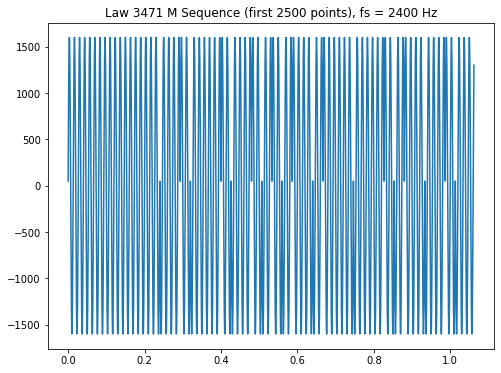

In [17]:
plt.subplots(figsize=(8,6))
plt.plot(tk[:2550],pk[:2550])
plt.title("Law 3471 M Sequence (first 2500 points), fs = 2400 Hz")
plt.show()

In [20]:
### Next generate matching pairs, and correlate
f1 = open(os.path.join(os.getcwd(),"rex/msequence/s1333.txt"))
f2 = open(os.path.join(os.getcwd(),"rex/msequence/s3471.txt"))
m1333 = np.array([int(x) for x in f1.readline().rstrip(",").split(",")])
m3471 = np.array([int(x) for x in f2.readline().rstrip(",").split(",")])
f1.close(); f2.close()


In [50]:
# How any points?  1023 symbols, Ts = Q / fc,  
# total time = Ts * N symbols;   Nuber data points = total time * fs + 1 (to get end point)

def make_signal(m, Q, fc, fs, phi=0.0):
    # Wake Island Data: #fc=75 Hz;   fs=250 Hz;   
    Ts=Q/fc

    # could start this in negative time to create a lag if desired...
    t=np.linspace(0, len(m)*Ts-1/fs, int(fs*len(m)*Ts ))
    p=np.zeros(t.shape[0])
    # STill can't think of away to modulate sequence with a loop
    for i in range(t.shape[0]):
        if t[i] >= 0:
            sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
            p[i] = np.sin(2*np.pi*fc*t[i] + phi+np.pi*m[sidx])

    return t, p

In [51]:
m3471.shape

(1023,)

In [87]:
# Signals, basic laws
t, p = make_signal(m3471, 2, 75, fk)
t2, p2 = make_signal(m1333, 2, 75, fk)

# Signals with different attributes, phase shift, doppler shift
# Test A - phase shift by 30 deg
# Test B - phase shift by 90 deg
# Test C - doppler by 0.1 Hz
# Test D - doppler by 0.3 Hz
# Test E - doppler by 0.5 Hz
# Test F - doppler by -0.5 Hz
t, pA = make_signal(m3471, 2, 75, fk, 30*np.pi/180)
t, pB = make_signal(m3471, 2, 75, fk, 90*np.pi/180)
t, pC = make_signal(m3471, 2, 75.01, fk )
t, pD = make_signal(m3471, 2, 75.05, fk )
t, pE = make_signal(m3471, 2, 75.1, fk )
t, pF = make_signal(m3471, 2, 75.2, fk ) 

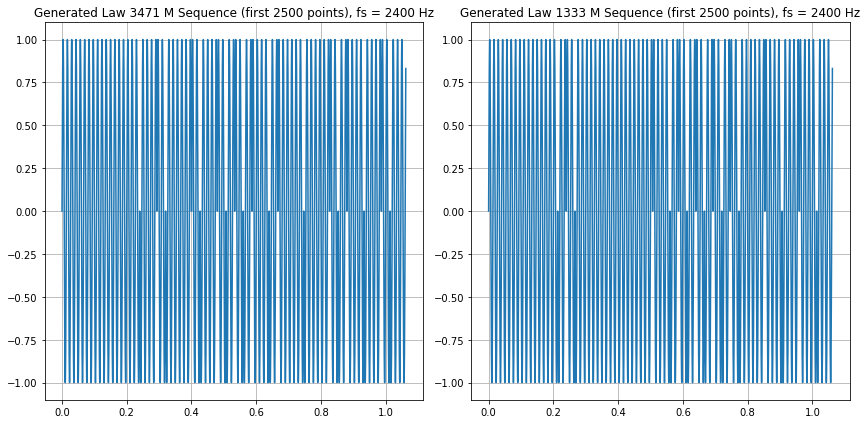

In [62]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(t[:2550],p[:2550])
ax[0].set_title("Generated Law 3471 M Sequence (first 2500 points), fs = 2400 Hz")
ax[0].grid()
ax[1].plot(t2[:2550],p2[:2550])
ax[1].set_title("Generated Law 1333 M Sequence (first 2500 points), fs = 2400 Hz")
ax[1].grid()
fig.tight_layout()
plt.show()

In [69]:
# Matched Filter = correlations of conjugate of s, or correlations of s
# Signals: 
#          pk    Signal loaded from .wav file (fs = 2400)
#          p     Signal generated, law 3471
#          p2    Signal generated, law 1333
a = signal.correlate(pk, p, mode='same', method='fft')/fk
aB = signal.correlate(pk, pB, mode='same', method='fft')/fk

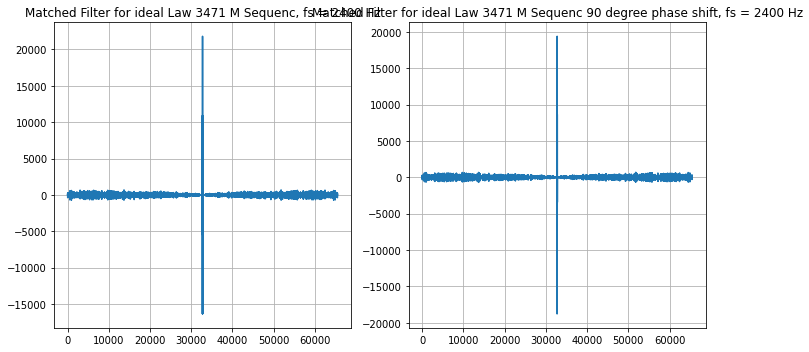

In [88]:
# Test 1, 0 and 90 degree phase shift
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(a)
ax[0].set_title("Matched Filter for ideal Law 3471 M Sequenc, fs = 2400 Hz")
ax[0].grid()
ax[1].plot(aB)
ax[1].set_title("Matched Filter for ideal Law 3471 M Sequenc 90 degree phase shift, fs = 2400 Hz")
ax[1].grid()
fig.tight_layout()
plt.show()

In [89]:

aC = signal.correlate(pk, pC, mode='same', method='fft')/fk
aD = signal.correlate(pk, pD, mode='same', method='fft')/fk
aE = signal.correlate(pk, pE, mode='same', method='fft')/fk
aF = signal.correlate(pk, pF, mode='same', method='fft')/fk


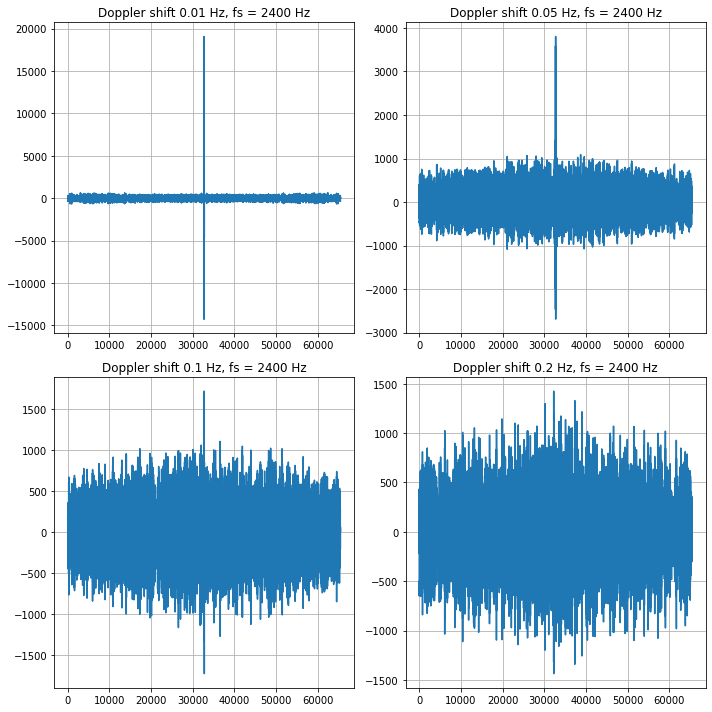

In [94]:
# Test 1, 0 and 90 degree phase shift
fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.title("Matched filter for M3471 with doppler shift")
ax[0,0].plot(aC)
ax[0,0].set_title("Doppler shift 0.01 Hz, fs = 2400 Hz")
ax[0,0].grid()
ax[0,1].plot(aD)
ax[0,1].set_title("Doppler shift 0.05 Hz, fs = 2400 Hz")
ax[0,1].grid()
ax[1,0].plot(aE)
ax[1,0].set_title("Doppler shift 0.1 Hz, fs = 2400 Hz")
ax[1,0].grid()
ax[1,1].plot(aF)
ax[1,1].set_title("Doppler shift 0.2 Hz, fs = 2400 Hz")
ax[1,1].grid()
fig.tight_layout()
plt.show()